In [65]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [67]:
# loading the dataset
df = pd.read_csv('Housing.csv')
print(df.head())
print(df.info())
print(df.describe(include='all'))
print(df.isnull().sum())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [69]:
# Encoding categorical columns
df = pd.get_dummies(df, drop_first=True)

In [71]:
# data after encoding
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [73]:
# simple Linear Regression &
# splitting the dataset for train-test
x = df[['area']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [75]:
# fitting a linear regression model and training it
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [77]:
# predicting
y_pred = model.predict(x_test)

In [79]:
print("Simple Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Simple Linear Regression:
MAE: 1474748.1337969352
MSE: 3675286604768.185
R2 Score: 0.27287851871974644


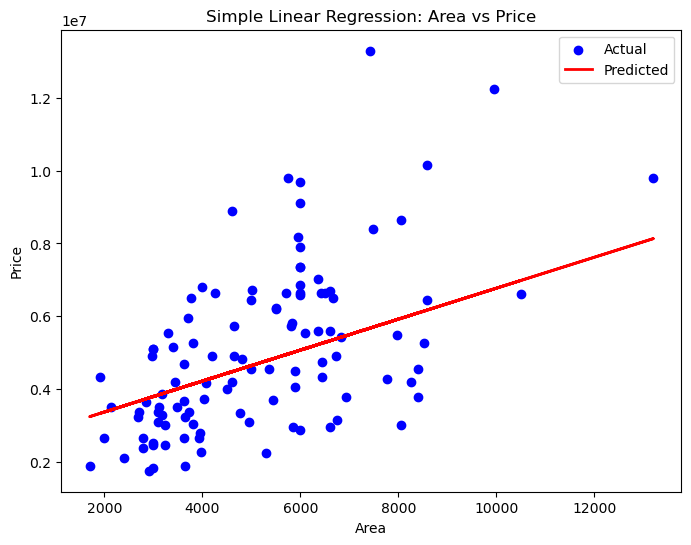

In [81]:
# Plot regression line
plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs Price')
plt.legend()
plt.show()

In [87]:
# multiple Linear Regression &
# splitting the dataset for train-test
X = df.drop('price', axis=1)
y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# Fitting linear regression model
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)


LinearRegression()

In [91]:
# Predict
y_pred_multi = multi_model.predict(X_test)

In [93]:
# Evaluation
print("Multiple Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_multi))
print("MSE:", mean_squared_error(y_test, y_pred_multi))
print("R2 Score:", r2_score(y_test, y_pred_multi))


Multiple Linear Regression:
MAE: 970043.4039201637
MSE: 1754318687330.6646
R2 Score: 0.6529242642153182


In [95]:
# Coefficients
coeff_df = pd.DataFrame(multi_model.coef_, index=X.columns, columns=['Coefficient'])
print(coeff_df)

                                  Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
parking                          2.248419e+05
mainroad_yes                     3.679199e+05
guestroom_yes                    2.316100e+05
basement_yes                     3.902512e+05
hotwaterheating_yes              6.846499e+05
airconditioning_yes              7.914267e+05
prefarea_yes                     6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05


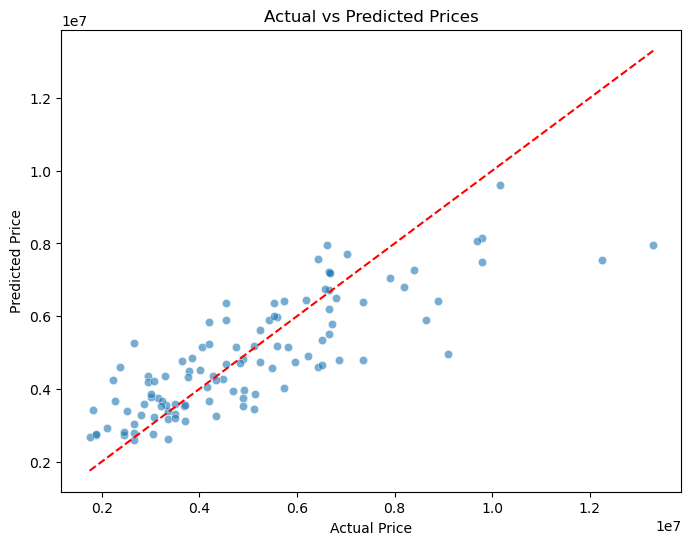

In [97]:
# plotting regression line between actual and predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_multi, alpha=0.6)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.show()